## **TASK 1 : PREDICTION USING SUPERVISED ML**
TO PREDICT THE MARKS ON THE BASIS OF STUDY HOURS OF THE STUDENTS

IMPORTING LIBRARIES

In [47]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING DATASET

In [48]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")

dataset.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


DATA PREPROCESSING

In [49]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [50]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [51]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [53]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [54]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [55]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [56]:
print(y_test)

[20 27 69 30 62]


TRAINING THE DATA OF TRAINING SET

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


MAKING PREDICTIONS

In [58]:
y_pred = np.round(regressor.predict(X_test),2)# Predicting the scores
print(y_pred)

[16.88 33.73 75.36 26.79 60.49]


COMPAIRING ACTUAL VS PREDICTED VALUES

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20      16.88
1      27      33.73
2      69      75.36
3      30      26.79
4      62      60.49


VISUALIZING TRAINING SET

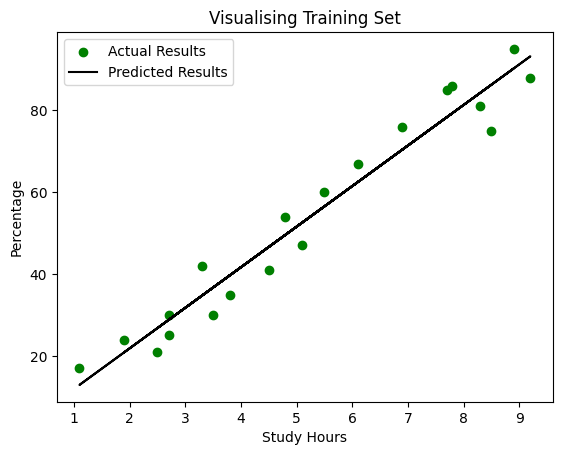

In [60]:
plt.scatter(X_train, y_train, color = 'green', label = 'Actual Results')
plt.plot(X_train, regressor.predict(X_train), color = 'black', label = 'Predicted Results')
plt.title('Visualising Training Set')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.legend()
plt.show()

VISUALIZING TEST SET

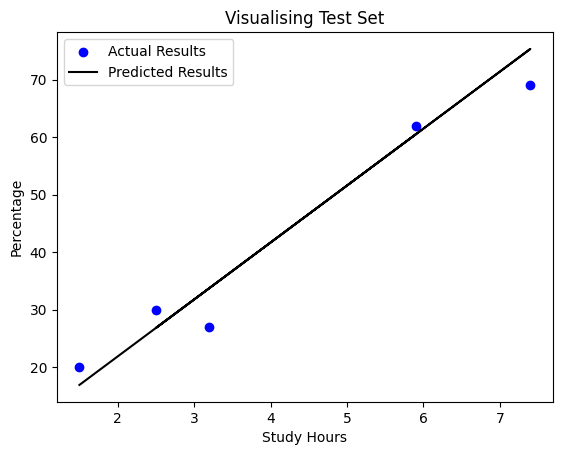

In [61]:
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual Results')
plt.plot(X_test, y_pred, color = 'black', label = 'Predicted Results')
plt.title('Visualising Test Set')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.legend()
plt.show()

PREDICTIONG OWN DATA

In [62]:
hours = 9.25
own_pred = np.round(regressor.predict([[hours]]),2)
print("hours : ",hours,"hours")
print("marks : ", float(own_pred),"%")

hours :  9.25 hours
marks :  93.69 %


MODEL EVALUATION

In [63]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.185999999999999
Mean Squared Error: 21.61221999999999
Root Mean Squared Error: 4.6488944922422135
Accuracy: 0.9454567433878458
